In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/sales womart/TRAIN.csv')
df_test = pd.read_csv('/content/drive/MyDrive/sales womart/TEST_FINAL.csv')

In [4]:
df = df[0:10000]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10000 non-null  object 
 1   Store_id       10000 non-null  int64  
 2   Store_Type     10000 non-null  object 
 3   Location_Type  10000 non-null  object 
 4   Region_Code    10000 non-null  object 
 5   Date           10000 non-null  object 
 6   Holiday        10000 non-null  int64  
 7   Discount       10000 non-null  object 
 8   #Order         10000 non-null  int64  
 9   Sales          10000 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [6]:
df = df.drop_duplicates()

In [7]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
9995,T1009996,290,S1,L1,R3,2018-01-28,0,Yes,89,62370.00
9996,T1009997,68,S1,L2,R4,2018-01-28,0,Yes,86,63609.00
9997,T1009998,167,S1,L1,R2,2018-01-28,0,Yes,75,52719.00
9998,T1009999,77,S2,L5,R3,2018-01-28,0,Yes,45,31203.00


In [8]:
df.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [9]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,183.008600,0.146000,64.746300,44724.218997
std,105.463228,0.353124,26.521544,17568.544968
min,1.000000,0.000000,9.000000,6468.000000
25%,92.000000,0.000000,47.000000,32491.440000
50%,183.000000,0.000000,60.000000,42051.000000
75%,274.000000,0.000000,76.000000,54021.750000
max,365.000000,1.000000,280.000000,166959.000000


In [10]:
df = df.rename(columns={'#Order':'Order'})
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


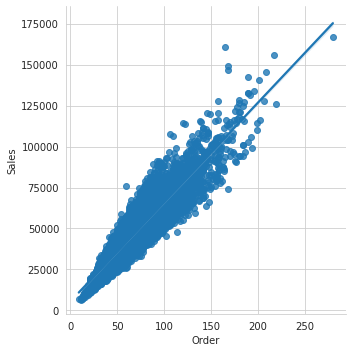

In [11]:
sns.set_style('whitegrid')
sns.lmplot('Order','Sales',data=df,scatter=True,palette='rainbow')

In [12]:
df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', 'Order', 'Sales'],
      dtype='object')

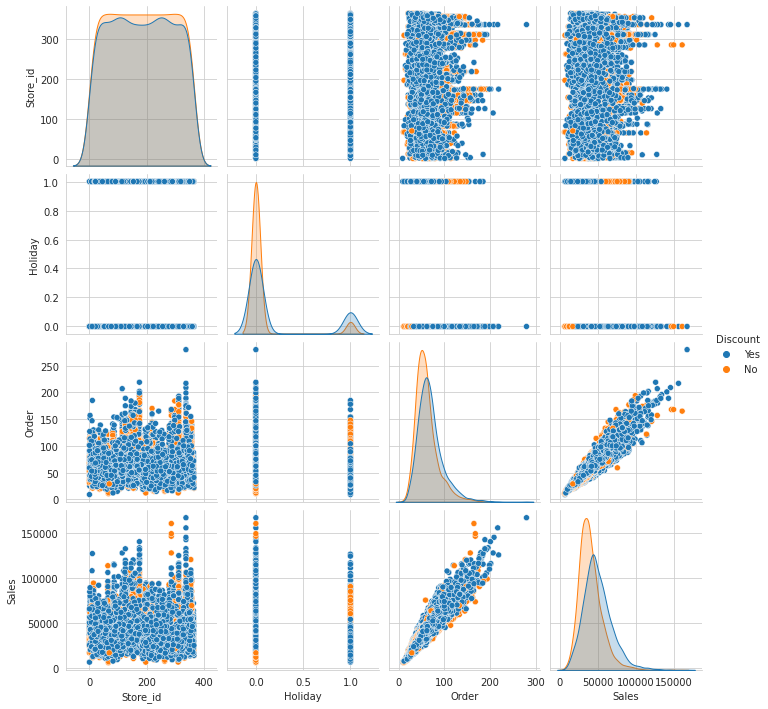

In [13]:
sns.pairplot(df,hue='Discount')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


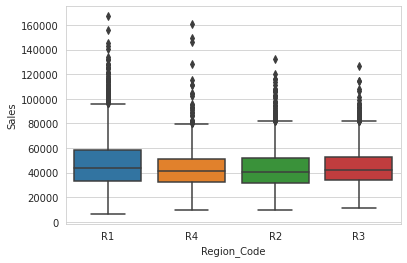

In [14]:
sns.boxplot(df['Region_Code'],df['Sales'],data=df)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


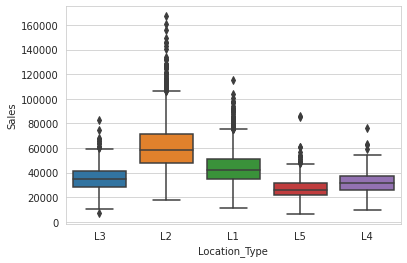

In [15]:
sns.boxplot(df['Location_Type'],df['Sales'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


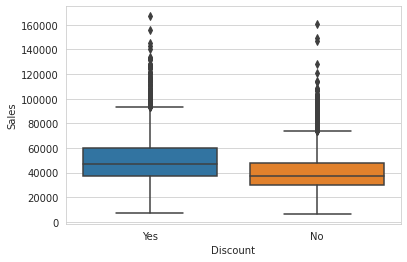

In [16]:
sns.boxplot(df['Discount'],df['Sales'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


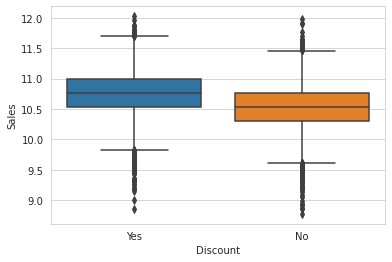

In [17]:
sns.boxplot(df['Discount'],np.log(df['Sales']),data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


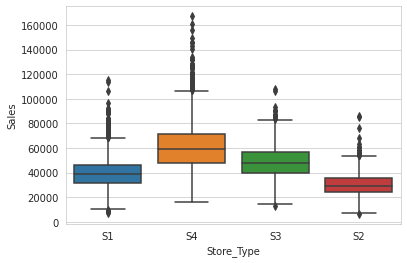

In [18]:
sns.boxplot(df['Store_Type'],df['Sales'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


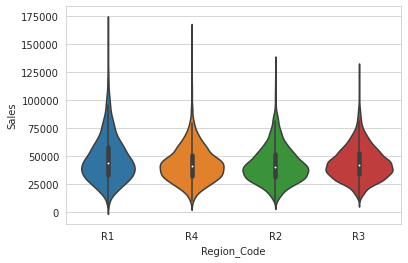

In [19]:
sns.violinplot(df['Region_Code'],df['Sales'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


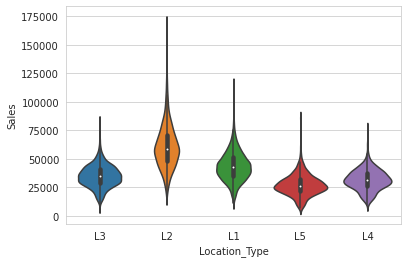

In [20]:
sns.violinplot(df['Location_Type'],df['Sales'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


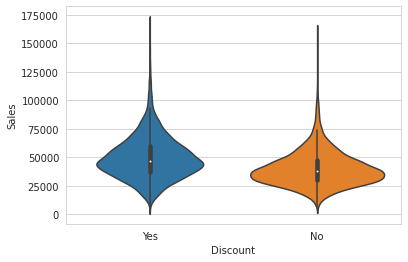

In [21]:
sns.violinplot(df['Discount'],df['Sales'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


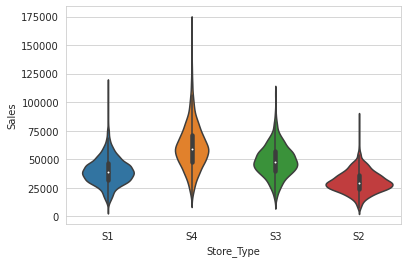

In [22]:
sns.violinplot(df['Store_Type'],df['Sales'],data=df)

In [23]:
df = df[['Store_Type', 'Location_Type', 'Region_Code','Holiday', 'Discount', 'Sales']]

In [24]:
df

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,S1,L3,R1,1,Yes,7011.84
1,S4,L2,R1,1,Yes,51789.12
2,S3,L2,R1,1,Yes,36868.20
3,S2,L3,R1,1,Yes,19715.16
4,S2,L3,R4,1,Yes,45614.52
...,...,...,...,...,...,...
9995,S1,L1,R3,0,Yes,62370.00
9996,S1,L2,R4,0,Yes,63609.00
9997,S1,L1,R2,0,Yes,52719.00
9998,S2,L5,R3,0,Yes,31203.00


In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
oe = OrdinalEncoder()
df['Store_Type'] = oe.fit_transform(df[['Store_Type']])
df['Region_Code'] = oe.fit_transform(df[['Region_Code']])
df['Discount'] = oe.fit_transform(df[['Discount']])
df['Location_Type'] = oe.fit_transform(df[['Location_Type']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [27]:
df

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,0.0,2.0,0.0,1,1.0,7011.84
1,3.0,1.0,0.0,1,1.0,51789.12
2,2.0,1.0,0.0,1,1.0,36868.20
3,1.0,2.0,0.0,1,1.0,19715.16
4,1.0,2.0,3.0,1,1.0,45614.52
...,...,...,...,...,...,...
9995,0.0,0.0,2.0,0,1.0,62370.00
9996,0.0,1.0,3.0,0,1.0,63609.00
9997,0.0,0.0,1.0,0,1.0,52719.00
9998,1.0,4.0,2.0,0,1.0,31203.00


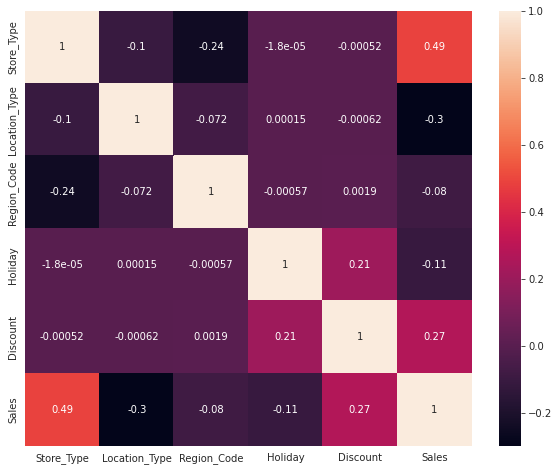

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
x1 = sm.add_constant(X)
result = sm.OLS(y_train,X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.823
Method:                 Least Squares   F-statistic:                              6501.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                        0.00
Time:                        07:45:41   Log-Likelihood:                         -79358.
No. Observations:                7000   AIC:                                  1.587e+05
Df Residuals:                    6995   BIC:                                  1.588e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Store_Type     1.364e+04    167.408     81.471      0.000    1.33e+04     1.4e+04
Location_Type  1987.9772    180.137     11.036      0.000    1634.855    2341.100
Region_Code    9175.6335    190.535     48.157      0.000    8802.128    9549.139
Holiday       -5169.6466    698.475     -7.401      0.000   -6538.869   -3800.424
Discount       2.245e+04    460.943     48.708      0.000    2.15e+04    2.34e+04
==============================================================================
Omnibus:                       17.940   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.023
Skew:                          -0.057   Prob(JB):                     2.72e-05
Kurtosis:                       3.243   Cond. No.                         6.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 1440x720 with 0 Axes>

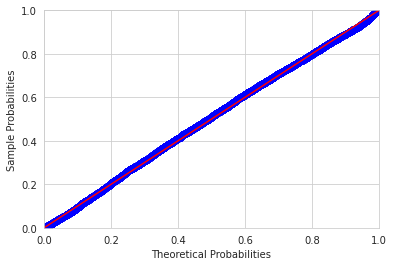

In [33]:
probplot = sm.ProbPlot(result.resid)
plt.figure(figsize=(20,10))
probplot.ppplot(line='45')
plt.show()

In [34]:
result.resid

9069   -22085.640683
2603     1920.096234
7738    21925.565322
1579   -14314.933022
5058     -816.011698
            ...     
5734   -22830.930551
5191    17496.263084
5390   -17973.978668
860      8772.675207
7270     1740.783542
Length: 7000, dtype: float64

In [35]:
result.predict(X_test) - y_test

6252     5619.542230
4684    -9802.313671
1731   -13765.362515
4742   -12287.996038
4521   -11400.675207
            ...     
8014   -17508.033682
1074     3469.686329
3063   -22423.366477
6487     1444.565053
4705   -13133.728265
Length: 3000, dtype: float64

In [36]:
predicted_resid = result.predict(X_test) - y_test

In [37]:
def get_standardized_values(vals):
  return(vals-vals.mean())/ vals.std()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


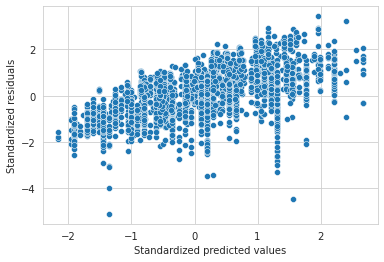

In [38]:
sns.scatterplot(get_standardized_values(result.predict(X_test)),get_standardized_values(predicted_resid))
plt.xlabel('Standardized predicted values')
plt.ylabel('Standardized residuals')
sns.set_style('whitegrid')

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [41]:
lr.score(X_train,y_train)

0.4080769820504867

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
mean_squared_error(y_test,lr_pred)

171853176.42264083

In [44]:
np.sqrt(mean_squared_error(y_test,lr_pred))

13109.278257121588

In [45]:
lr.predict(X_test)

array([22535.53749138, 60944.76209966, 48066.25947982, ...,
       36587.04654435, 26048.41475462, 64379.51059523])

In [46]:
df_test = df_test[['Store_Type', 'Location_Type', 'Region_Code','Holiday', 'Discount']]

In [47]:
oe = OrdinalEncoder()
df_test['Store_Type'] = oe.fit_transform(df_test[['Store_Type']])
df_test['Region_Code'] = oe.fit_transform(df_test[['Region_Code']])
df_test['Discount'] = oe.fit_transform(df_test[['Discount']])
df_test['Location_Type'] = oe.fit_transform(df_test[['Location_Type']])

In [48]:
df_test

,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,3.0,1.0,2.0,0,0.0
1,0.0,0.0,0.0,0,0.0
2,3.0,1.0,0.0,0,0.0
3,0.0,0.0,3.0,0,0.0
4,0.0,0.0,1.0,0,0.0
...,...,...,...,...,...
22260,1.0,4.0,1.0,0,0.0
22261,3.0,1.0,0.0,0,0.0
22262,0.0,0.0,2.0,0,1.0
22263,0.0,0.0,3.0,0,0.0


In [49]:
lr.predict(df_test)

array([53510.34699843, 36383.69676479, 53103.64743932, ...,
       47862.90970026, 36993.74610346, 43331.3225236 ])

In [50]:
pd.DataFrame({'Sales_test':lr.predict(df_test)})

,Sales_test
0,53510.346998
1,36383.696765
2,53103.647439
3,36993.746103
4,36587.046544
...,...
22260,29279.813471
22261,53103.647439
22262,47862.909700
22263,36993.746103


In [52]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf.score(X_train,y_train)

0.5821264107610836

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
tree.score(X_train,y_train)

0.5822450615689269

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn.score(X_train,y_train)

0.4998735783172618

In [65]:
from sklearn.svm import LinearSVR

In [78]:
svm_reg = LinearSVR()
svm_reg.fit(X_train,y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [79]:
svm_reg.predict(X_test)

array([16506.804973  , 14100.609946  , 17557.21989201, ...,
       40892.43978401, 19215.804973  , 37641.43978401])

In [80]:
svm_reg.score(X_train,y_train)

-1.360805248170772

In [69]:
from sklearn.svm import SVR

In [77]:
svm_poly_reg = SVR(kernel="poly",degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(X_train,y_train)
svm_poly_reg.predict(X_test)
svm_poly_reg.score(X_train,y_train)

0.4477047254092812

In [81]:
import tensorflow as tf


In [113]:
model = tf.keras.models.Sequential()


In [114]:
model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(1))

In [115]:
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=350)

Epoch 1/350
110/110 [==============================] - 1s 6ms/step - loss: 2097271808.0000 - val_loss: 973834752.0000
Epoch 2/350
110/110 [==============================] - 0s 4ms/step - loss: 410526528.0000 - val_loss: 301249472.0000
Epoch 3/350
110/110 [==============================] - 0s 4ms/step - loss: 276646784.0000 - val_loss: 241330384.0000
Epoch 4/350
110/110 [==============================] - 0s 4ms/step - loss: 229146656.0000 - val_loss: 205257664.0000
Epoch 5/350
110/110 [==============================] - 0s 4ms/step - loss: 201455024.0000 - val_loss: 183513104.0000
Epoch 6/350
110/110 [==============================] - 1s 5ms/step - loss: 187172496.0000 - val_loss: 174693600.0000
Epoch 7/350
110/110 [==============================] - 0s 4ms/step - loss: 181645264.0000 - val_loss: 171024368.0000
Epoch 8/350
110/110 [==============================] - 0s 4ms/step - loss: 179047024.0000 - val_loss: 169368928.0000
Epoch 9/350
110/110 [==============================] - 0s 4ms/s

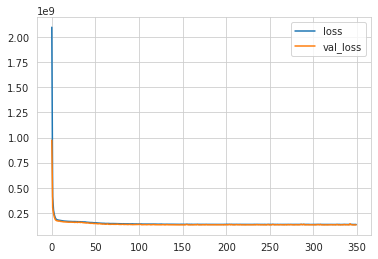

In [116]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [117]:
prediction = model.predict(X_test)

In [118]:
rmse = np.sqrt(mean_squared_error(y_test,prediction))
rmse

11418.327147671469

In [119]:
prediction

array([[37886.15 ],
       [48268.047],
       [38405.637],
       ...,
       [22398.172],
       [49228.94 ],
       [50884.348]], dtype=float32)